# Unit 5 - Financial Planning

In [5]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np
import json

%matplotlib inline

In [6]:
# Load .env enviroment variables
load_dotenv(".env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [7]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

shares_data = {
    "shares": [my_btc, my_eth]
}

# Set the tickers
tickers = ["BTC", "ETH"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
BTC,1.2
ETH,5.3


In [8]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [9]:
# Fetch current BTC price
btc_data = requests.get(btc_url)
btc_content = btc_data.content
btc = btc_data.json()

# Fetch current ETH price
eth_data = requests.get(eth_url)
eth_content = eth_data.content
eth = eth_data.json()

In [10]:
# Compute current value of my crypto
my_btc_value = 42240 * my_btc
my_eth_value = 3228.08 * my_eth
my_crypto_portfolio = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The aggregate value of your crypto portfolio is ${my_crypto_portfolio:0.2f}")

The current value of your 1.2 BTC is $50688.00
The current value of your 5.3 ETH is $17108.82
The aggregate value of your crypto portfolio is $67796.82


In [11]:
# Aimed for possible future use

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_API_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [14]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
start_date = pd.Timestamp("2022-01-10", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-10", tz="America/New_York").isoformat()

# (use a limit=1000 parameter to call the most recent 1000 days of data)
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    df_closing_prices[ticker] = ticker_data[ticker]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head()

# Preview DataFrame
df_closing_prices

,AGG,SPY
2022-01-10,112.41,465.56


In [15]:
# Pick AGG and SPY close prices
agg_close_price = float(df_closing_prices["AGG"])
spy_close_price = float(df_closing_prices["SPY"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")

Current AGG closing price: $112.41
Current SPY closing price: $465.56


In [16]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
my_stocks_portfolio = my_spy_value + my_agg_value
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current aggregate value of you stocks portfolio is ${my_stocks_portfolio:0.2f}")

The current value of your 50 SPY shares is $23278.00
The current value of your 200 AGG shares is $22482.00
The current aggregate value of you stocks portfolio is $45760.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
consolidated_assets_value = my_spy_value + my_agg_value + my_btc_value + my_eth_value

# Create savings DataFrame
data = {
    "amount": [my_crypto_portfolio, my_stocks_portfolio]
}

# Set tickers 
tickers = ["Crypto", "Stocks"]
df_savings = pd.DataFrame(data, tickers)

# Display savings DataFrame
df_savings.head()

,amount
Crypto,67796.824
Stocks,45760.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

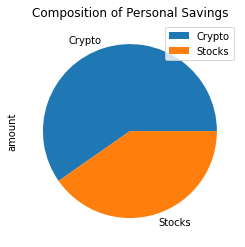

In [18]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title="Composition of Personal Savings")

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_crypto_portfolio + my_stocks_portfolio

# Validate saving health
x = emergency_fund 
y = my_crypto_portfolio + my_stocks_portfolio

if y >= x:
    print(f'Congratulations! You have enough money in your emergency fund.')

Congratulations! You have enough money in your emergency fund.


In [20]:
# Aimed for possible future use

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Set timeframe to '1D'
timeframe = "1D"

# Set the ticker information
tickers = ["SPY","AGG"]

# Get 3 year's worth of historical price data for SPY and AGG
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.55,.45],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [24]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\UNIVE\onedrive\desktop\fintech_working_copy\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996574,1.000098,1.002361,0.999744,1.004106,0.991629,0.995639,1.001560,1.001740,0.998278,...,0.998318,1.001431,1.009706,1.000617,0.998229,1.000980,0.992719,0.992818,1.009183,1.005476
2,1.004453,1.000071,1.009416,0.994031,1.009355,0.984723,0.984863,1.004877,0.993372,1.002850,...,1.001056,1.004728,1.007524,1.000464,1.000677,1.000604,0.991693,0.997009,0.999897,1.014246
3,1.005751,1.008359,1.008920,0.990778,1.007321,0.987235,0.989608,0.998481,1.000439,1.011166,...,0.997256,1.009398,1.010889,0.997046,1.005765,1.009469,0.994575,0.999408,0.999864,1.023409
4,0.997766,1.012152,1.023545,0.991915,1.007549,0.984791,0.987254,0.995797,1.002568,1.004606,...,1.001553,1.002567,1.008239,1.001629,1.002561,1.011099,0.989934,0.998177,1.006876,1.027146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.682091,10.643330,21.455420,9.823660,4.878132,13.489211,11.891838,12.109403,18.079390,10.230556,...,12.405518,3.971505,7.228996,4.898686,9.263791,4.685433,7.244526,7.720450,6.730332,5.961125
7557,12.763313,10.674858,21.335263,9.877471,4.847885,13.366374,11.789793,12.131436,18.234999,10.304428,...,12.306133,3.992915,7.146961,4.914856,9.265934,4.631886,7.238885,7.738611,6.793010,5.945107
7558,12.696768,10.731158,21.387216,9.762809,4.843561,13.346549,11.816347,12.082510,18.274095,10.250049,...,12.319531,3.992120,7.090908,4.904598,9.251722,4.617931,7.237525,7.710506,6.887640,5.943764
7559,12.615033,10.714222,21.450842,9.737889,4.904978,13.223161,11.702914,12.102232,18.160104,10.277094,...,12.289557,3.948563,7.129372,4.929893,9.326630,4.620364,7.235411,7.653954,6.914156,5.946391


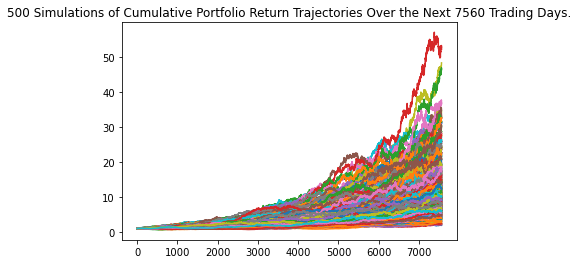

In [27]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

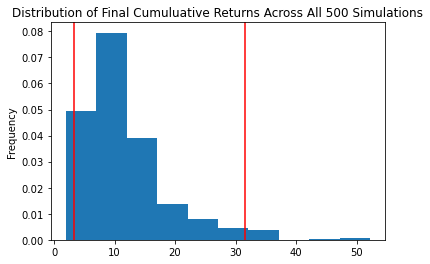

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             11.519256
std               7.116243
min               1.929624
25%               6.981180
50%               9.534287
75%              13.996854
max              52.256646
95% CI Lower      3.313487
95% CI Upper     31.572040
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
initial_investment = 20000 

ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $66269.73 and $631440.8


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $99404.6 and $947161.2


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.45,.55],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_fiveyear.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\UNIVE\onedrive\desktop\fintech_working_copy\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007689,1.004177,1.005187,0.989024,1.004604,1.004497,1.005645,1.001538,0.990237,0.992105,...,1.001429,0.990492,1.019900,1.005944,1.009554,0.995537,0.994329,0.997911,0.996884,0.999684
2,1.003706,0.996420,1.012410,0.986280,1.001324,1.001038,1.002774,0.996379,0.984019,0.985001,...,0.997106,0.986195,1.016724,0.990746,1.015416,0.999215,0.993795,0.994890,1.006309,0.999830
3,1.006098,0.993215,1.011398,0.980973,1.007001,1.000908,0.999442,1.001372,0.976076,0.992046,...,0.999703,0.998999,1.009320,0.993775,1.017453,0.998042,0.983635,0.994695,0.998186,1.001663
4,1.008321,0.991246,1.020474,0.984969,1.010491,0.996784,0.991034,1.000232,0.976617,0.991452,...,0.997302,1.008467,0.998977,0.995415,1.020983,1.011302,1.003799,0.992447,1.006952,1.013087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.501354,1.384011,1.649127,1.374271,1.422118,1.471220,1.561507,1.138084,1.582849,1.520217,...,1.652242,1.752203,1.036822,1.933337,1.841050,1.347975,2.077552,1.402596,1.712216,1.349739
1257,1.512518,1.394323,1.645557,1.376561,1.417716,1.472148,1.579672,1.129061,1.593144,1.524328,...,1.660183,1.749795,1.060253,1.919192,1.849628,1.349164,2.100625,1.399482,1.719446,1.347638
1258,1.495184,1.399311,1.636153,1.381801,1.411763,1.469176,1.592246,1.140079,1.598036,1.522769,...,1.633502,1.743013,1.058236,1.911416,1.851194,1.346810,2.119449,1.388500,1.722143,1.364562
1259,1.503231,1.403488,1.632082,1.407147,1.392490,1.474516,1.594046,1.144461,1.616793,1.541683,...,1.620790,1.737603,1.061084,1.916438,1.860441,1.351654,2.101267,1.396047,1.745292,1.364797


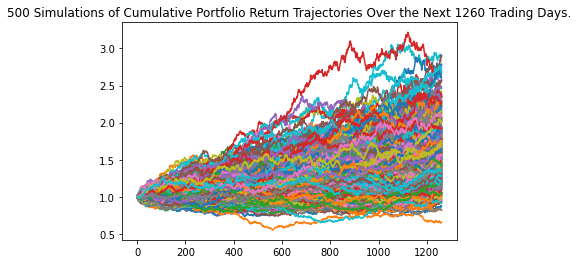

In [39]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

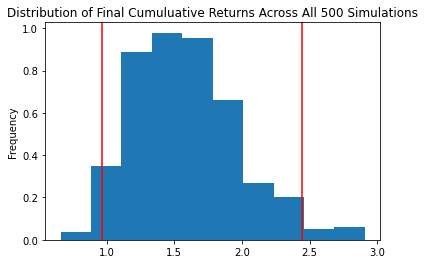

In [40]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.583340
std               0.387056
min               0.659782
25%               1.302770
50%               1.540686
75%               1.817557
max               2.907154
95% CI Lower      0.963588
95% CI Upper      2.441840
Name: 1260, dtype: float64


In [44]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57815.27 and $146510.43


### Ten Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_ticker, 
    weights = [.50,.50], 
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_tenyear.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [46]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\UNIVE\onedrive\desktop\fintech_working_copy\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007196,0.994169,1.001630,1.004669,0.992695,1.008458,0.991498,1.003245,1.003797,1.009807,...,0.996228,0.998175,1.001338,0.994925,0.993129,0.995750,1.011498,0.999210,1.002569,0.984400
2,1.011983,0.987312,0.999452,1.004300,0.989152,1.007204,0.997126,1.007743,0.994143,1.015262,...,1.009079,1.007828,1.004201,0.993118,0.999182,1.009497,1.015522,1.003855,1.004760,0.978061
3,1.000346,0.993420,1.003125,1.002084,0.993396,0.996165,0.999017,1.002024,1.000537,1.018400,...,1.017847,1.004935,1.000186,0.998759,1.003904,1.006961,1.017432,1.001659,1.008114,0.976369
4,0.996610,0.994882,0.995057,1.005341,0.998421,1.011259,1.002440,1.004524,1.004772,1.016123,...,1.021588,1.004245,1.000893,0.995644,1.007013,1.009223,1.016864,1.008513,1.010659,0.968181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.684863,1.724422,3.852489,2.296679,0.812113,2.594701,1.376781,1.968662,2.457200,2.246723,...,2.479556,3.920803,1.560068,1.516293,1.871279,1.650001,3.657320,1.584364,2.000690,1.302457
2517,1.667320,1.724253,3.828743,2.328841,0.810128,2.565554,1.386821,1.947386,2.459808,2.266693,...,2.481763,3.952712,1.558132,1.503615,1.837975,1.648233,3.649033,1.588060,1.983619,1.297344
2518,1.672142,1.718175,3.821719,2.344352,0.802093,2.576558,1.384149,1.961847,2.458106,2.239830,...,2.480296,3.945373,1.563115,1.503522,1.851981,1.672735,3.644523,1.582211,1.977402,1.295884
2519,1.682807,1.728012,3.812890,2.344633,0.808496,2.590462,1.381490,1.986351,2.465817,2.247985,...,2.496820,3.937241,1.555084,1.505832,1.869064,1.669078,3.637768,1.574277,1.974154,1.308742


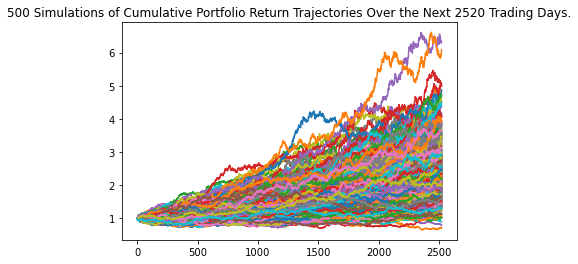

In [47]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

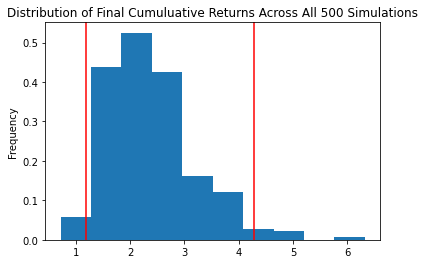

In [48]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.377416
std               0.820907
min               0.721052
25%               1.770892
50%               2.220274
75%               2.813667
max               6.320528
95% CI Lower      1.181370
95% CI Upper      4.275412
Name: 2520, dtype: float64


In [50]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70882.19 and $256524.69


In [51]:
# Aimed for possible future use